In [ ]:
# mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing the required dependencies
!pip install inltk --quiet
!pip install nest_asyncio --quiet

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from inltk.inltk import tokenize
from inltk.inltk import setup
import nest_asyncio
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
nest_asyncio.apply()

In [ ]:
# reading the training set
df_train = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/train.csv', encoding = 'utf-8')
df_train.head()

,news,source,label
0,ಈ ವ್ಯಕ್ತಿ ಪ್ರೌಢಶಾಲೆಯಲ್ಲಿ 26 ಬಾರಿ ಫೇಲ್ ಆಗಿದ್ದಾನೆ,oneindia,0
1,ಸರ್ಕಾರದ ಜೊತೆ ಉದ್ಧವ್ ಠಾಕ್ರೆಯ ಪಕ್ಷವನ್ನೂ ವಶಪಡಿಸ್ಕ...,asianet,1
2,ಹುಲಿ ಸಂರಕ್ಷಿತ ಪ್ರದೇಶ ಘೋಷಣೆ ಸಿಎಂ ನಿರ್ಧಾರಕ್ಕೆ ಉಮ...,prajavani,1
3,108 ಗಂಟೆಯಲ್ಲಿ 75 ಕಿಮೀ ರಸ್ತೆ ನಿರ್ಮಾಣದ ಗುರಿ ಗಿನ್...,asianet,1
4,ಬಾಳಾಠಾಕ್ರೆ ತಿಲಕ ಇಡುತ್ತಿರುವುದು ಏಕನಾಥ್ ಶಿಂಧೆಗಲ್...,asianet,0


In [ ]:
# reading the testing set
df_test = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/test.csv', encoding = 'utf-8')
df_test.head()

,news,source,label
0,ನಿರಂತರ ಮಳೆ: ಕೊಳೆತ ಉದ್ದು ಬೆಳೆ ...,prajavani,1
1,ಸಲಿಂಗ ಸಂಬಂಧ ವಿರೋಧಿಸಿದ್ದಕ್ಕೆ ಲಿಂಗ ಬದಲಿಸಿಕೊಂಡಳು,asianet,1
2,ನ್ಯೂಯಾರ್ಕ್ ಟೈಮ್ಸ್‌ ಮುಖಪುಟದಲ್ಲಿ ಮೋದಿ ಬಗ್ಗೆ ವರದ...,oneindia,0
3,ಡ್ರೋಣ್ ಬಾಯ್ ಪ್ರತಾಪ್‌ನನ್ನು ವಿಜ್ಞಾನಿಯಾಗಿ DRDOಗೆ ...,factly,0
4,"ಎಸ್ಎಂಕೆ, ನಾರಾಯಣ ಮೂರ್ತಿ, ಪ್ರಕಾಶ್ ಪಡುಕೋಣೆಗೆ ಕೆಂಪ...",asianet,1


In [ ]:
# removing the null rows
df_train = df_train.dropna()
df_test = df_test.dropna()

In [ ]:
# splitting the datasets into dependent and independent variables
x_train = df_train['news']
y_train = df_train['label']
x_test = df_test['news']
y_test = df_test['label']

In [ ]:
# converting the news headlines into word vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
# creating a passive aggressive classifier
pac = PassiveAggressiveClassifier(max_iter = 6)
pac.fit(tfidf_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=6)

In [ ]:
# predicting the headlines in the testing set as true or fake
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 71.4%


In [ ]:
# printing the classification report of the passive aggressive classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       200
           1       0.73      0.83      0.78       300

    accuracy                           0.71       500
   macro avg       0.70      0.69      0.69       500
weighted avg       0.71      0.71      0.71       500



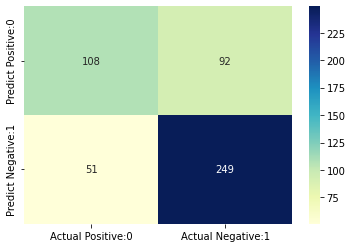

In [ ]:
# displaying the confusion matrix for the passive aggressive classifier
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:0', 'Actual Negative:1'], index = ['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')